In [142]:
#Making necessary imports:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [143]:
os.chdir('D:\Deeksha\Data Science-Deeksha\Capstone Project')

In [144]:
revised_data=pd.read_excel('Preprocessed Data.xlsx')


In [145]:
def boxplot_outlier_removal(X, exclude=['']):
    '''
    remove outliers detected by boxplot (Q1/Q3 -/+ IQR*1.5)

    Parameters
    ----------
    X : dataframe
      dataset to remove outliers from
    exclude : list of str
      column names to exclude from outlier removal

    Returns
    -------
    X : dataframe
      dataset with outliers removed
    '''
    before = len(X)

    # iterate each column
    for col in X.columns:
        if col not in exclude:
            # get Q1, Q3 & Interquantile Range
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            # define outliers and remove them
            filter_ = (X[col] > Q1 - 1.5 * IQR) & (X[col] < Q3 + 1.5 *IQR)
            X = X[filter_]

    after = len(X)
    diff = before-after
    percent = diff/before*100
    print('{} ({:.2f}%) outliers removed'.format(diff, percent))
    return X


In [146]:
#exclude list for outliers... not removing outliers for Est fam contribution and unmet need for new dataset
exclude_list=['STDNT_GENDER','STDNT_BACKGROUND','IN_STATE_FLAG','STDNT_MAJOR','STDNT_MINOR',
              'FIRST_TERM','CORE_COURSE_NAME_1_F','CORE_COURSE_GRADE_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_GRADE_2_F',
              'CORE_COURSE_NAME_3_F','CORE_COURSE_GRADE_3_F','SECOND_TERM','CORE_COURSE_NAME_1_S','CORE_COURSE_GRADE_1_S',
                'CORE_COURSE_NAME_2_S','CORE_COURSE_GRADE_2_S','HOUSING_STS','RETURNED_2ND_YR',
              'FATHER_HI_EDU_DESC','MOTHER_HI_EDU_DESC','age_group','CORE_COURSE_NAME_1_F_GROUPED',
              'CORE_COURSE_NAME_2_F_GROUPED','CORE_COURSE_NAME_3_F_GROUPED','CORE_COURSE_NAME_1_S_GROUPED',
              'CORE_COURSE_NAME_2_S_GROUPED','STDNT_AGE','RETURNED_2ND_YR','FATHER_HI_EDU_CD','MOTHER_HI_EDU_CD','COST_OF_ATTEND']

data2=revised_data

data2.shape

(3400, 35)

In [147]:
boxplot_outlier_removal(data2,exclude_list)

1041 (30.62%) outliers removed


,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,...,MOTHER_HI_EDU_CD,MOTHER_HI_EDU_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,18,F,BGD 1,Y,Undeclared,N,1150,2007-08,ANTH 1105,A,...,3,No Information,16,16,14,14,0,0,0,0.0
2,18,M,BGD 1,Y,Mathematics,N,1030,2010-08,ANTH 1105,A,...,4,Other/Unknown,15,15,14,14,0,0,0,0.0
3,18,M,BGD 1,Y,Undeclared,N,1220,2007-08,ANTH 1107,A,...,3,College/Beyond,13,13,14,14,0,0,0,0.0
4,18,F,BGD 1,Y,Art,N,1190,2008-08,ANTH 1107,A,...,2,High School,12,12,12,12,835920,1355760,519840,278340.0
5,18,M,BGD 1,Y,Political Science,N,1070,2010-08,ARAB 1001,A,...,3,College/Beyond,15,15,16,16,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3383,19,M,BGD 3,Y,Psychology,N,990,2008-08,ECON 2106,F,...,2,High School,12,6,14,13,0,0,0,0.0
3391,18,F,BGD 1,N,Pre-Business,N,990,2010-08,ITDS 2749,F,...,3,No Information,17,6,14,13,0,0,0,0.0
3396,18,F,BGD 1,Y,Biology,N,950,2007-08,POLS 1101,B,...,3,No Information,13,9,14,13,0,0,0,0.0
3398,18,F,BGD 3,Y,Joint Enrollment - Accel,N,990,2010-08,PSYC 1101,C,...,3,College/Beyond,12,9,14,13,0,269100,0,-231720.0


In [148]:
# on hot encoding for large dummy variables
def on_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label,1,0)
        

In [149]:
#for one hot encoding for student major
top_10=[x for x in data2.STDNT_MAJOR.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data2,'STDNT_MAJOR',top_10)
data2.shape

(3400, 45)

In [150]:
top_10=[x for x in data2.CORE_COURSE_NAME_1_F.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data2,'CORE_COURSE_NAME_1_F',top_10)

data2.shape

(3400, 55)

In [151]:
top_10=[x for x in data2.CORE_COURSE_NAME_2_F.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data2,'CORE_COURSE_NAME_2_F',top_10)
data2.shape

(3400, 65)

In [152]:
top_10=[x for x in data2.CORE_COURSE_NAME_3_F.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data2,'CORE_COURSE_NAME_3_F',top_10)
data2.shape

(3400, 75)

In [153]:
top_10=[x for x in data2.CORE_COURSE_NAME_1_S.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data2,'CORE_COURSE_NAME_1_S',top_10)
data2.shape

(3400, 85)

In [154]:
top_10=[x for x in data2.CORE_COURSE_NAME_2_S.value_counts().sort_values(ascending=False).head(10).index]

top_10

on_hot_top_x(data2,'CORE_COURSE_NAME_2_S',top_10)
data2.shape

(3400, 95)

In [141]:
 pd.set_option("display.max_rows", max_rows, "display.max_columns", max_cols)

NameError: name 'max_rows' is not defined

In [113]:
drop_col_list=['CORE_COURSE_NAME_1_F',
               'CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F','CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S',
               'STDNT_MAJOR']

data2.drop(drop_col_list,axis=1)

,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MINOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_GRADE_1_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_GRADE_3_F,...,CORE_COURSE_NAME_2_S_ENGL 1102,CORE_COURSE_NAME_2_S_COMM 1110,CORE_COURSE_NAME_2_S_POLS 1101,CORE_COURSE_NAME_2_S_HIST 2111,CORE_COURSE_NAME_2_S_HIST 2112,CORE_COURSE_NAME_2_S_MATH 1111,CORE_COURSE_NAME_2_S_ENGL 1101,CORE_COURSE_NAME_2_S_MUSC 1100,CORE_COURSE_NAME_2_S_PSYC 1101,CORE_COURSE_NAME_2_S_ECON 2105
0,18,F,BGD 1,Y,N,1150,2007-08,A,A,A,...,0,0,0,0,0,0,0,0,0,0
1,19,F,BGD 1,N,N,1190,2008-08,A,A,A,...,1,0,0,0,0,0,0,0,0,0
2,18,M,BGD 1,Y,N,1030,2010-08,A,A,A,...,0,0,0,0,0,0,0,0,0,0
3,18,M,BGD 1,Y,N,1220,2007-08,A,A,B,...,0,0,0,0,1,0,0,0,0,0
4,18,F,BGD 1,Y,N,1190,2008-08,A,A,A,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,18,F,BGD 4,N,N,790,2008-08,A,B,B,...,1,0,0,0,0,0,0,0,0,0
3396,18,F,BGD 1,Y,N,950,2007-08,B,B,B,...,1,0,0,0,0,0,0,0,0,0
3397,18,F,BGD 4,Y,N,1030,2008-08,C,B,B,...,1,0,0,0,0,0,0,0,0,0
3398,18,F,BGD 3,Y,N,990,2010-08,C,B,B,...,1,0,0,0,0,0,0,0,0,0


In [114]:

drop_col_final=['STDNT_GENDER','STDNT_MINOR','STDNT_TEST_ENTRANCE_COMB','DISTANCE_FROM_HOME','HIGH_SCHL_GPA','FATHER_HI_EDU_CD',
               'MOTHER_HI_EDU_CD','FIRST_TERM_ATTEMPT_HRS','GROSS_FIN_NEED','UNMET_NEED']

data2=data2.drop(drop_col_final,axis=1)

In [115]:
def subject_grade(data2,sub):
    data2[sub+'_Num']=np.where(data2[sub]=='A', 1,
                                      np.where(data2[sub]=='B', 2,
                                      np.where(data2[sub]=='C', 3,
                                      np.where(data2[sub]=='D', 4,
                                      np.where(data2[sub]=='F', 5,
                                      np.where(data2[sub]=='NOT REP', 6,
                                      np.where(data2[sub]=='INCOMPL', 7,8)))))))
    return data2

In [116]:
subject_grade(data2,'CORE_COURSE_GRADE_1_F')
subject_grade(data2,'CORE_COURSE_GRADE_2_F')
subject_grade(data2,'CORE_COURSE_GRADE_3_F')
subject_grade(data2,'CORE_COURSE_GRADE_1_S')
subject_grade(data2,'CORE_COURSE_GRADE_2_S')

,STDNT_AGE,STDNT_BACKGROUND,IN_STATE_FLAG,STDNT_MAJOR,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_NAME_3_F,...,CORE_COURSE_NAME_2_S_MATH 1111,CORE_COURSE_NAME_2_S_ENGL 1101,CORE_COURSE_NAME_2_S_MUSC 1100,CORE_COURSE_NAME_2_S_PSYC 1101,CORE_COURSE_NAME_2_S_ECON 2105,CORE_COURSE_GRADE_1_F_Num,CORE_COURSE_GRADE_2_F_Num,CORE_COURSE_GRADE_3_F_Num,CORE_COURSE_GRADE_1_S_Num,CORE_COURSE_GRADE_2_S_Num
0,18,BGD 1,Y,Undeclared,2007-08,ANTH 1105,A,ARTH 1100,A,ENGL 1102,...,0,0,0,0,0,1,1,1,1,1
1,19,BGD 1,N,Undeclared,2008-08,ANTH 1105,A,GERM 1002,A,ITDS 2735,...,0,0,0,0,0,1,1,1,1,1
2,18,BGD 1,Y,Mathematics,2010-08,ANTH 1105,A,ENGL 1101,A,HIST 2111,...,0,0,0,0,0,1,1,1,1,1
3,18,BGD 1,Y,Undeclared,2007-08,ANTH 1107,A,COMM 1110,A,ENGL 1101,...,0,0,0,0,0,1,1,2,1,1
4,18,BGD 1,Y,Art,2008-08,ANTH 1107,A,ARTH 1100,A,CPSC 1105,...,0,1,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,18,BGD 4,N,Music Performance,2008-08,COMM 1110,A,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,1,2,2,3,2
3396,18,BGD 1,Y,Biology,2007-08,POLS 1101,B,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,2,2,2,3,2
3397,18,BGD 4,Y,Biology,2008-08,ENGL 1101,C,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,3,2,2,3,2
3398,18,BGD 3,Y,Joint Enrollment - Accel,2010-08,PSYC 1101,C,ENGL 1101,B,ENGL 1101,...,0,0,0,0,0,3,2,2,3,2


In [117]:
data3=data2

del_final=['FIRST_TERM','SECOND_TERM','CORE_COURSE_GRADE_1_F','CORE_COURSE_GRADE_2_F','CORE_COURSE_GRADE_3_F','CORE_COURSE_GRADE_1_S',
               'CORE_COURSE_GRADE_2_S','CORE_COURSE_NAME_1_F','CORE_COURSE_NAME_2_F','CORE_COURSE_NAME_3_F',
               'CORE_COURSE_NAME_1_S','CORE_COURSE_NAME_2_S','STDNT_MAJOR']


In [118]:
data3=data3.drop(del_final,axis=1)

In [119]:
data4=pd.get_dummies(data3)

In [120]:
X=data4.drop('RETURNED_2ND_YR',axis=1)

In [121]:
y=data3['RETURNED_2ND_YR']

In [122]:
X.shape

(3400, 93)

In [123]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.3,random_state=200)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Number transactions X_train dataset:  (2380, 93)
Number transactions y_train dataset:  (2380,)
Number transactions X_test dataset:  (1020, 93)
Number transactions y_test dataset:  (1020,)
Before OverSampling, counts of label '1': 1876
Before OverSampling, counts of label '0': 504 



In [124]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)   # error is thrown here

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (3752, 93)
After OverSampling, the shape of train_y: (3752,) 

After OverSampling, counts of label '1': 1876
After OverSampling, counts of label '0': 1876


In [125]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_res,X_train_res)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.339030
         Iterations 9
                                       Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.511    
Dependent Variable:            RETURNED_2ND_YR           AIC:                       2730.0841
Date:                          2021-03-13 08:00          BIC:                       3309.4782
No. Observations:              3752                      Log-Likelihood:            -1272.0  
Df Model:                      92                        LL-Null:                   -2600.7  
Df Residuals:                  3659                      LLR p-value:               0.0000   
Converged:                     1.0000                    Scale:                     1.0000   
No. Iterations:                9.0000                                                        
--------------------------------------------------------------------------------------------

In [127]:
list1=['STDNT_AGE','SECOND_TERM_ATTEMPT_HRS','SECOND_TERM_EARNED_HRS','STDNT_MAJOR_Psychology','STDNT_MAJOR_Theatre Arts','STDNT_MAJOR_Music Performance','CORE_COURSE_NAME_1_F_ENGL 1101','CORE_COURSE_NAME_1_F_COMM 1110','CORE_COURSE_NAME_1_F_HIST 2111','CORE_COURSE_NAME_1_F_MATH 1111','CORE_COURSE_NAME_1_F_HIST 2112','CORE_COURSE_NAME_1_F_POLS 1101','CORE_COURSE_NAME_2_F_HIST 2111','CORE_COURSE_NAME_3_F_ENGL 1101','CORE_COURSE_NAME_3_F_HIST 2111','CORE_COURSE_NAME_3_F_MATH 1111',
     'CORE_COURSE_NAME_3_F_COMM 1110','CORE_COURSE_NAME_3_F_POLS 1101','CORE_COURSE_NAME_3_F_PSYC 1101','CORE_COURSE_NAME_1_S_ENGL 1102','CORE_COURSE_NAME_1_S_COMM 1110','CORE_COURSE_NAME_1_S_POLS 1101','CORE_COURSE_NAME_1_S_HIST 2111','CORE_COURSE_NAME_1_S_MATH 1111','CORE_COURSE_NAME_1_S_ECON 2106','CORE_COURSE_NAME_2_S_ENGL 1102','CORE_COURSE_NAME_2_S_COMM 1110','CORE_COURSE_NAME_2_S_POLS 1101','CORE_COURSE_GRADE_1_S_Num','CORE_COURSE_GRADE_2_S_Num','STDNT_BACKGROUND_BGD 1','STDNT_BACKGROUND_BGD 2','STDNT_BACKGROUND_BGD 3',
      'STDNT_BACKGROUND_BGD 4','STDNT_BACKGROUND_BGD 6','STDNT_BACKGROUND_BGD 7','STDNT_BACKGROUND_BGD 8','IN_STATE_FLAG_N','IN_STATE_FLAG_Y','HOUSING_STS_Off Campus','HOUSING_STS_On Campus','FATHER_HI_EDU_DESC_College/Beyond','FATHER_HI_EDU_DESC_High School','FATHER_HI_EDU_DESC_Middle School/Junior High','FATHER_HI_EDU_DESC_No Information','FATHER_HI_EDU_DESC_Other/Unknown','MOTHER_HI_EDU_DESC_College/Beyond','MOTHER_HI_EDU_DESC_High School','MOTHER_HI_EDU_DESC_Middle School/Junior High','MOTHER_HI_EDU_DESC_No Information','MOTHER_HI_EDU_DESC_Other/Unknown']

X=X_train_res[list1]
y=y_train_res
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.349602
         Iterations 9
                                       Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.496    
Dependent Variable:            RETURNED_2ND_YR           AIC:                       2725.4099
Date:                          2021-03-13 08:03          BIC:                       3043.1422
No. Observations:              3752                      Log-Likelihood:            -1311.7  
Df Model:                      50                        LL-Null:                   -2600.7  
Df Residuals:                  3701                      LLR p-value:               0.0000   
Converged:                     1.0000                    Scale:                     1.0000   
No. Iterations:                9.0000                                                        
--------------------------------------------------------------------------------------------

In [129]:
del_list2=['CORE_COURSE_NAME_1_F_POLS 1101','CORE_COURSE_NAME_1_S_ENGL 1102','CORE_COURSE_NAME_2_S_COMM 1110','CORE_COURSE_NAME_3_F_PSYC 1101']

X=X.drop(del_list2,axis=1)

In [130]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.351192
         Iterations 9
                                       Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.493    
Dependent Variable:            RETURNED_2ND_YR           AIC:                       2729.3462
Date:                          2021-03-13 08:03          BIC:                       3022.1583
No. Observations:              3752                      Log-Likelihood:            -1317.7  
Df Model:                      46                        LL-Null:                   -2600.7  
Df Residuals:                  3705                      LLR p-value:               0.0000   
Converged:                     1.0000                    Scale:                     1.0000   
No. Iterations:                9.0000                                                        
--------------------------------------------------------------------------------------------

In [131]:
X=X.drop('STDNT_MAJOR_Psychology',axis=1)

In [132]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.351645
         Iterations 9
                                       Results: Logit
Model:                         Logit                     Pseudo R-squared:          0.493    
Dependent Variable:            RETURNED_2ND_YR           AIC:                       2730.7409
Date:                          2021-03-13 08:04          BIC:                       3017.3229
No. Observations:              3752                      Log-Likelihood:            -1319.4  
Df Model:                      45                        LL-Null:                   -2600.7  
Df Residuals:                  3706                      LLR p-value:               0.0000   
Converged:                     1.0000                    Scale:                     1.0000   
No. Iterations:                9.0000                                                        
--------------------------------------------------------------------------------------------

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Deeksha Malik\nanaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[423 152]
 [ 30 521]]


In [136]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82       575
           1       0.77      0.95      0.85       551

    accuracy                           0.84      1126
   macro avg       0.85      0.84      0.84      1126
weighted avg       0.86      0.84      0.84      1126



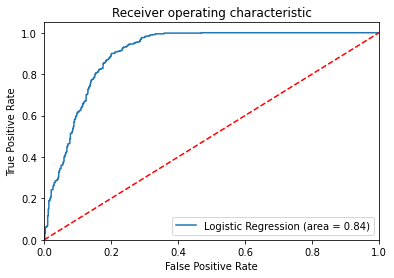

In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

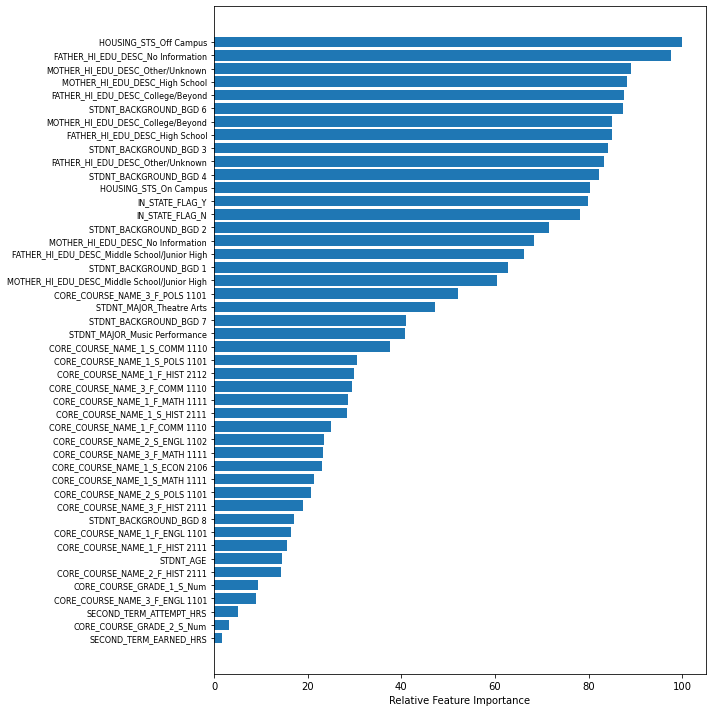

In [139]:
feature_importance = abs(logreg.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,10))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()